In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.datasets import load_iris

In [ ]:
iris=load_iris()
print(iris)
     

In [9]:
features=iris.feature_names
print(features)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
X=iris.data
X.shape

(150, 4)

In [11]:
y=iris.target
print(y.shape)

(150,)


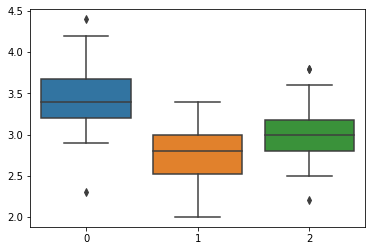

In [12]:
sns.boxplot(x=iris.target , y=iris.data[:,1])

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [15]:
model=LinearRegression()

In [16]:

lin_model=model.fit(X_train,y_train)

In [17]:
print(lin_model.score(X_test,y_test))

0.9301353978346002


In [18]:
predictions=lin_model.predict(X_test)
print(predictions)

[-0.00302297  0.88094174 -0.04397816  1.70647709  1.5807169   1.14306479
 -0.10088299  1.40339885  1.67733998  0.91230997 -0.01437764  1.06709644
  0.93822211  1.48935188  0.09865848  1.37781776 -0.20932415 -0.08906456
  1.73822078 -0.1007281   0.05580321  1.16802689  1.88152021 -0.09224572
  1.8475898  -0.02893476  1.8019955   1.99669925 -0.16817027  1.57574675
  0.18003912  1.18463862  2.01965114 -0.02765367  1.26060732  1.68478471
  2.16484996  1.99117614]


In [ ]:
!pip install gradio

In [20]:
def classify(num):
    if num<0.5:
        return 'Setosa'
    elif num <1.5:
        return 'Versicolor'
    else:
        return 'Virginica'

In [21]:
import gradio as gr
import numpy as np
def predict_flower(sl,sw,pl,pw):
    input_array=np.array([[sl,sw,pl,pw]])
    pred=lin_model.predict(input_array)
    output=classify(pred[0])
    if output=='Setosa':
      return [(0,output)]
    elif output=='Versicolor':
      return [(1,output)]
    else:
      return [(2,output)]

In [ ]:
sl = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="Sepal Length")
sw = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="Sepal Width")
pl = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="Petal Length")
pw = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="Petal Width")
op=gr.outputs.HighlightedText(color_map={ "Setosa": "lightgreen",
        "Versicolor": "pink",
        "Virginica": "yellow",})
gr.Interface(predict_flower, inputs=[sl,sw,pl,pw], outputs=op,live=True).launch('share=True',debug=True)

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:240: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/components.py:3370: UserWarning: The 'color_map' parameter has been moved from the constructor to `HighlightedText.style()` 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/blocks.py:217: UserWarning: api_name predict already exists, using predict_1
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/blocks.py:217: UserWar

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>